# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Cao Nguyễn Khánh
- MSSV: 21127627
- Lớp: 21CLC04

# Import

In [1]:
import pandas as pd
# import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 10 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 10 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần



# Cài đặt hàm

In [3]:
# Cài đặt các hàm cần thiết ở đây

def CTMoHinh(model, selected_features): 
    # In ra công thức của mô hình hồi quy
    coefficients = model.coef_
    
    formula = "Salary = {:.2f} + ".format(model.intercept_)  # Hệ số chặn
    for i, coef in enumerate(coefficients):
        feature_name = selected_features[i]
        formula += "{:.3f}*{} + ".format(coef, feature_name)
    formula = formula[:-2]  # Loại bỏ dấu + cuối cùng
    return formula



def Find_Best_Feature(features):
    best_feature = None
    lowest_mae = float('inf')  # Khởi tạo với giá trị dương vô cùng để so sánh
    
    # Thực hiện K-fold Cross Validation và tìm đặc trưng tốt nhất
    for feature in features:
        X = X_train[[feature]]
        y = y_train
        
        model = LinearRegression()
    
        # Tính MAE bằng K-fold Cross Validation
        mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        avg_mae = mae_scores.mean()
        print(feature , '| MAE =' , avg_mae)
        
        if avg_mae < lowest_mae:
            lowest_mae = avg_mae
            best_feature = feature    
            
    return best_feature


def Find_Best_Model(models):
    best_model = None
    lowest_mae = float('inf')  # Khởi tạo với giá trị dương vô cùng để so sánh
    i=0
    # Thực hiện K-fold Cross Validation và tìm mô hình tốt nhất từ các modes
    for modeltemp in models:
        X = X_train[modeltemp]
        y = y_train
        
        model = LinearRegression()
    
        # Tính MAE bằng K-fold Cross Validation
        mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
        avg_mae = mae_scores.mean()
        
        i = i+1
        print("Mode", i, ' | Avg MAE =' , avg_mae)
        
        if avg_mae < lowest_mae:
            lowest_mae = avg_mae
            best_model = modeltemp
              
    return best_model

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

### Xử lý dữ liệu 

In [4]:
# Phần code cho yêu cầu 1a
selected_features = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
                     'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain']

# Tạo DataFrame mới X_train11 với chỉ 11 đặc trưng đầu tiên
X_train11 = X_train[selected_features]
X_test11 = X_test[selected_features]


### Huấn luyện 1 lần duy nhất cho 11 đặc trưng nói trên cho toàn bộ tập huấn luyện

In [5]:
# Xây dựng và huấn luyện mô hình hồi quy tuyến tính trên toàn bộ dữ liệu
model1a = LinearRegression()
model1a.fit(X_train11, y_train)


LinearRegression()

### Công thức cho mô hình hồi quy (tính  𝑦 theo 11 đặc trưng trên)

In [6]:
print(CTMoHinh(model1a, selected_features))

Salary = 49248.09 + -23183.330*Gender + 702.767*10percentage + 1259.019*12percentage + -99570.608*CollegeTier + 18369.962*Degree + 1297.532*collegeGPA + -8836.727*CollegeCityTier + 141.760*English + 145.742*Logical + 114.643*Quant + 34955.750*Domain 


### Kết quả trên tập kiểm tra (test.csv) cho mô hình vừa huấn luyện được

In [7]:
# Dự đoán giá trị mức lương trên toàn bộ dữ liệu
y_pred1a = model1a.predict(X_test11)

y_pred1a

array([194207.93160491, 340719.58717406, 325416.84861397, 273672.74799754,
       298369.36726444, 352015.74694404, 234779.7619092 , 261961.54605652,
       266112.40481144, 372849.64049772, 301599.21406001, 279946.54486441,
       228413.01407561, 305770.45016173, 403117.84794154, 311514.75295673,
       255771.6406102 , 249511.47496086, 282050.50784367, 342932.68002501,
       252047.78684692, 331783.8543578 , 392592.81848188, 441556.83514415,
       237549.86845078, 406144.5863516 , 325347.97152288, 340287.86083972,
       339589.96608669, 359034.7906052 , 337830.75631687, 388921.75950567,
       307399.94344879, 507243.30753988, 303046.98974608, 288503.42897022,
       488343.13883449, 307550.03410941, 373338.98609063, 281018.74597146,
       499929.31989583, 360613.09095212, 266862.5060087 , 386429.00791345,
       236977.45662334, 391749.09033547, 312501.27630642, 255610.43006437,
       474422.70383532, 300598.05757003, 293416.22841846, 369686.76439215,
       250401.61675547, 2

### MAE của mô hình 

In [8]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
# Đánh giá hiệu suất mô hình trên toàn bộ dữ liệu
mae1a = mean_absolute_error(y_test, y_pred1a)
print("Mean Absolute Error:", mae1a)

Mean Absolute Error: 105052.52978823172


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

### Xử lý dữ liệu 

In [9]:
# Các đặc trưng tính cách
personality_features = ['conscientiousness', 'agreeableness', 'extraversion',
                        'nueroticism', 'openess_to_experience']


### Tìm ra đặc trưng tốt nhất, In ra các kết quả cross-validation như yêu cầu

In [10]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

best_feature = Find_Best_Feature(personality_features)

print('\nĐặc trưng tốt nhất là: ', best_feature)

conscientiousness | MAE = 124444.48696126812
agreeableness | MAE = 123813.28712231014
extraversion | MAE = 123914.50490042963
nueroticism | MAE = 123738.52541404287
openess_to_experience | MAE = 124119.48107191359

Đặc trưng tốt nhất là:  nueroticism


### Huấn luyện lại mô hình với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

In [11]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

# Khởi tạo mô hình hồi quy tuyến tính
best_personality_feature_model = LinearRegression()

# Chọn đặc trưng tốt nhất và huấn luyện mô hình trên toàn bộ dữ liệu
X_best = X_train[[best_feature]]
y_best = y_train
best_personality_feature_model.fit(X_best, y_best)

LinearRegression()

###  Công thức cho mô hình hồi quy theo đặc trưng tốt nhất 

In [12]:
best_feature1b = [best_feature]

print(CTMoHinh(best_personality_feature_model, best_feature1b))

Salary = 304647.55 + -16021.494*nueroticism 


### Kết quả trên tập kiểm tra (test.csv) cho mô hình vừa huấn luyện được

In [13]:
X_test1b = X_test[[best_feature]]
y_pred1b = best_personality_feature_model.predict(X_test1b)
y_pred1b

array([316828.69418332, 296119.31147609, 297530.8050677 , 294185.51719111,
       290122.46639849, 313063.16252799, 273875.06967607, 303649.41349713,
       279174.97977939, 302310.01662701, 334806.41222121, 301766.88799187,
       300278.49123069, 311181.11766754, 298246.96583438, 296217.04258743,
       342930.9116571 , 338869.46301384, 307414.46450765, 306371.46527027,
       311651.66893639, 316828.69418332, 328713.43818163, 298001.83698135,
       277936.51831933, 298246.96583438, 340899.38626079, 316828.69418332,
       299883.8818418 , 298246.96583438, 306371.46527027, 328713.43818163,
       322476.2706991 , 312464.43930985, 316527.49010248, 277936.51831933,
       326681.91278532, 308402.99066658, 314946.16867806, 312371.51464661,
       326681.91278532, 307414.46450765, 298001.83698135, 312464.43930985,
       294707.33723968, 308827.56024862, 316527.49010248, 303649.41349713,
       318557.41334943, 322620.46414205, 288092.54315154, 307414.46450765,
       292354.26046557, 2

### MAE của mô hình hồi quy theo đặc trưng tốt nhất

In [14]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
mae1b = mean_absolute_error(y_test, y_pred1b)

print("Mean Absolute Error:", mae1b)

Mean Absolute Error: 119361.91739987816


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

### Xử lý dữ liệu 

In [15]:
# Các đặc trưng đặc trưng ngoại ngữ, lô-gic, định lượng
skill_features = ['English', 'Logical', 'Quant']


### Tìm ra đặc trưng tốt nhất, In ra các kết quả cross-validation như yêu cầu

In [16]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

best_feature = Find_Best_Feature(skill_features)

print('\nĐặc trưng tốt nhất là: ', best_feature)

English | MAE = 120963.06945762748
Logical | MAE = 120037.71893286356
Quant | MAE = 117461.46396286949

Đặc trưng tốt nhất là:  Quant


### Huấn luyện lại mô hình với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

In [17]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

# Khởi tạo mô hình hồi quy tuyến tính
best_skill_feature_model = LinearRegression()

# Chọn đặc trưng tốt nhất và huấn luyện mô hình trên toàn bộ dữ liệu
X_best = X_train[[best_feature]]
y_best = y_train

best_skill_feature_model.fit(X_best, y_best)


LinearRegression()

### Công thức cho mô hình hồi quy theo đặc trưng tốt nhất

In [18]:
best_feature1c = [best_feature]
print(CTMoHinh(best_skill_feature_model, best_feature1c))


Salary = 117759.73 + 368.852*Quant 


### Kết quả trên tập kiểm tra (test.csv) cho mô hình vừa huấn luyện được

In [19]:
X_test1c = X_test[[best_feature]]
y_pred1c = best_skill_feature_model.predict(X_test1c)

y_pred1c

array([197063.00903697, 359358.09312464, 337226.9452945 , 270833.50180409,
       302185.96123012, 300341.69891094, 283743.33803834, 278210.5510808 ,
       315095.79746437, 357513.83080546, 289276.12499587, 285587.60035752,
       296653.17427259, 348292.51920957, 383333.50327396, 333538.42065615,
       289276.12499587, 292964.64963423, 311407.27282601, 351981.04384793,
       267144.97716574, 300341.69891094, 313251.53514519, 329849.89601779,
       248702.35397395, 309563.01050683, 305874.48586848, 333538.42065615,
       318415.46963889, 300341.69891094, 305874.48586848, 355669.56848629,
       292964.64963423, 363046.617763  , 302185.96123012, 302185.96123012,
       394399.07718903, 296653.17427259, 307718.74818765, 322103.99427724,
       335382.68297533, 348292.51920957, 281899.07571916, 313251.53514519,
       211817.10759039, 337226.9452945 , 368579.40472053, 281899.07571916,
       368579.40472053, 355669.56848629, 313251.53514519, 370423.66703971,
       256079.40325067, 3

### MAE của mô hình hồi quy theo đặc trưng tốt nhất

In [20]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
mse1c = mean_absolute_error(y_test, y_pred1c)

print("Mean Absolute Error:", mse1c)

Mean Absolute Error: 108814.05968837194


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [21]:
# Trình bày các phần tìm ra mô hình
# Tính hệ số tương quan giữa các thuộc tính
correlations = train.corr()
correlations

Gender  10percentage  12percentage  CollegeTier  \
Gender                 1.000000      0.165208      0.131372     0.028943   
10percentage           0.165208      1.000000      0.644518    -0.135469   
12percentage           0.131372      0.644518      1.000000    -0.092920   
CollegeTier            0.028943     -0.135469     -0.092920     1.000000   
Degree                -0.007080     -0.255081     -0.227924    -0.014755   
collegeGPA             0.153008      0.311057      0.340745    -0.091280   
CollegeCityTier        0.044938      0.106144      0.120529    -0.093067   
English               -0.020830      0.335863      0.193790    -0.182399   
Logical               -0.000189      0.309735      0.240047    -0.189068   
Quant                 -0.104069      0.326948      0.316088    -0.240973   
Domain                 0.001947      0.079001      0.069002    -0.037476   
ComputerProgramming    0.021369      0.041760      0.076158    -0.047969   
ElectronicsAndSemicon -0.019304      0.088068      0.123903    -0.026150   
ComputerScience       -0.031236     -0.024749     -0.050739    -0.020929   
MechanicalEngg        -0.083987      0.060161      0.042870    -0.015850   
ElectricalEngg        -0.024408      0.068455      0.085593     0.012326   
TelecomEngg            0.028421      0.060164      0.057063    -0.010562   
CivilEngg             -0.013109      0.009898      0.000678     0.007080   
conscientiousness      0.075360      0.050050      0.044066     0.036467   
agreeableness          0.087639      0.115473      0.093829    -0.036447   
extraversion           0.006984     -0.022176     -0.031926    -0.006246   
nueroticism            0.011918     -0.121777     -0.083520     0.038786   
openess_to_experience  0.084511      0.015292     -0.007928    -0.019414   
Salary                -0.036183      0.155174      0.149531    -0.174824   

                         Degree  collegeGPA  CollegeCityTier   English  \
Gender                -0.007080    0.153008         0.044938 -0.020830   
10percentage          -0.255081    0.311057         0.106144  0.335863   
12percentage          -0.227924    0.340745         0.120529  0.193790   
CollegeTier           -0.014755   -0.091280        -0.093067 -0.182399   
Degree                 1.000000    0.080067        -0.001511 -0.145472   
collegeGPA             0.080067    1.000000         0.030261  0.099539   
CollegeCityTier       -0.001511    0.030261         1.000000  0.028303   
English               -0.145472    0.099539         0.028303  1.000000   
Logical               -0.098722    0.200165        -0.006065  0.431918   
Quant                 -0.137183    0.221253        -0.019965  0.368248   
Domain                 0.010125    0.083268         0.013744  0.106778   
ComputerProgramming    0.110226    0.139499         0.043879  0.121789   
ElectronicsAndSemicon -0.133786    0.026659         0.047274 -0.000923   
ComputerScience       -0.015129   -0.013137        -0.006909  0.086161   
MechanicalEngg        -0.061272   -0.033850        -0.046042 -0.008649   
ElectricalEngg        -0.057312    0.055134         0.016535  0.029723   
TelecomEngg           -0.079172   -0.000657         0.077937 -0.018019   
CivilEngg             -0.014273   -0.035964        -0.034213 -0.028461   
conscientiousness      0.003147    0.048044         0.012093  0.024610   
agreeableness         -0.033432    0.053377         0.009984  0.174948   
extraversion           0.009707   -0.054623         0.008211  0.003313   
nueroticism            0.021054   -0.074752         0.033827 -0.147243   
openess_to_experience  0.014351    0.005078         0.015314  0.061630   
Salary                -0.017602    0.122469         0.004575  0.169293   

                        Logical     Quant  ...  MechanicalEngg  \
Gender                -0.000189 -0.104069  ...       -0.083987   
10percentage           0.309735  0.326948  ...        0.060161   
12percentage           0.240047  0.316088  ...        0.042870   
CollegeTi

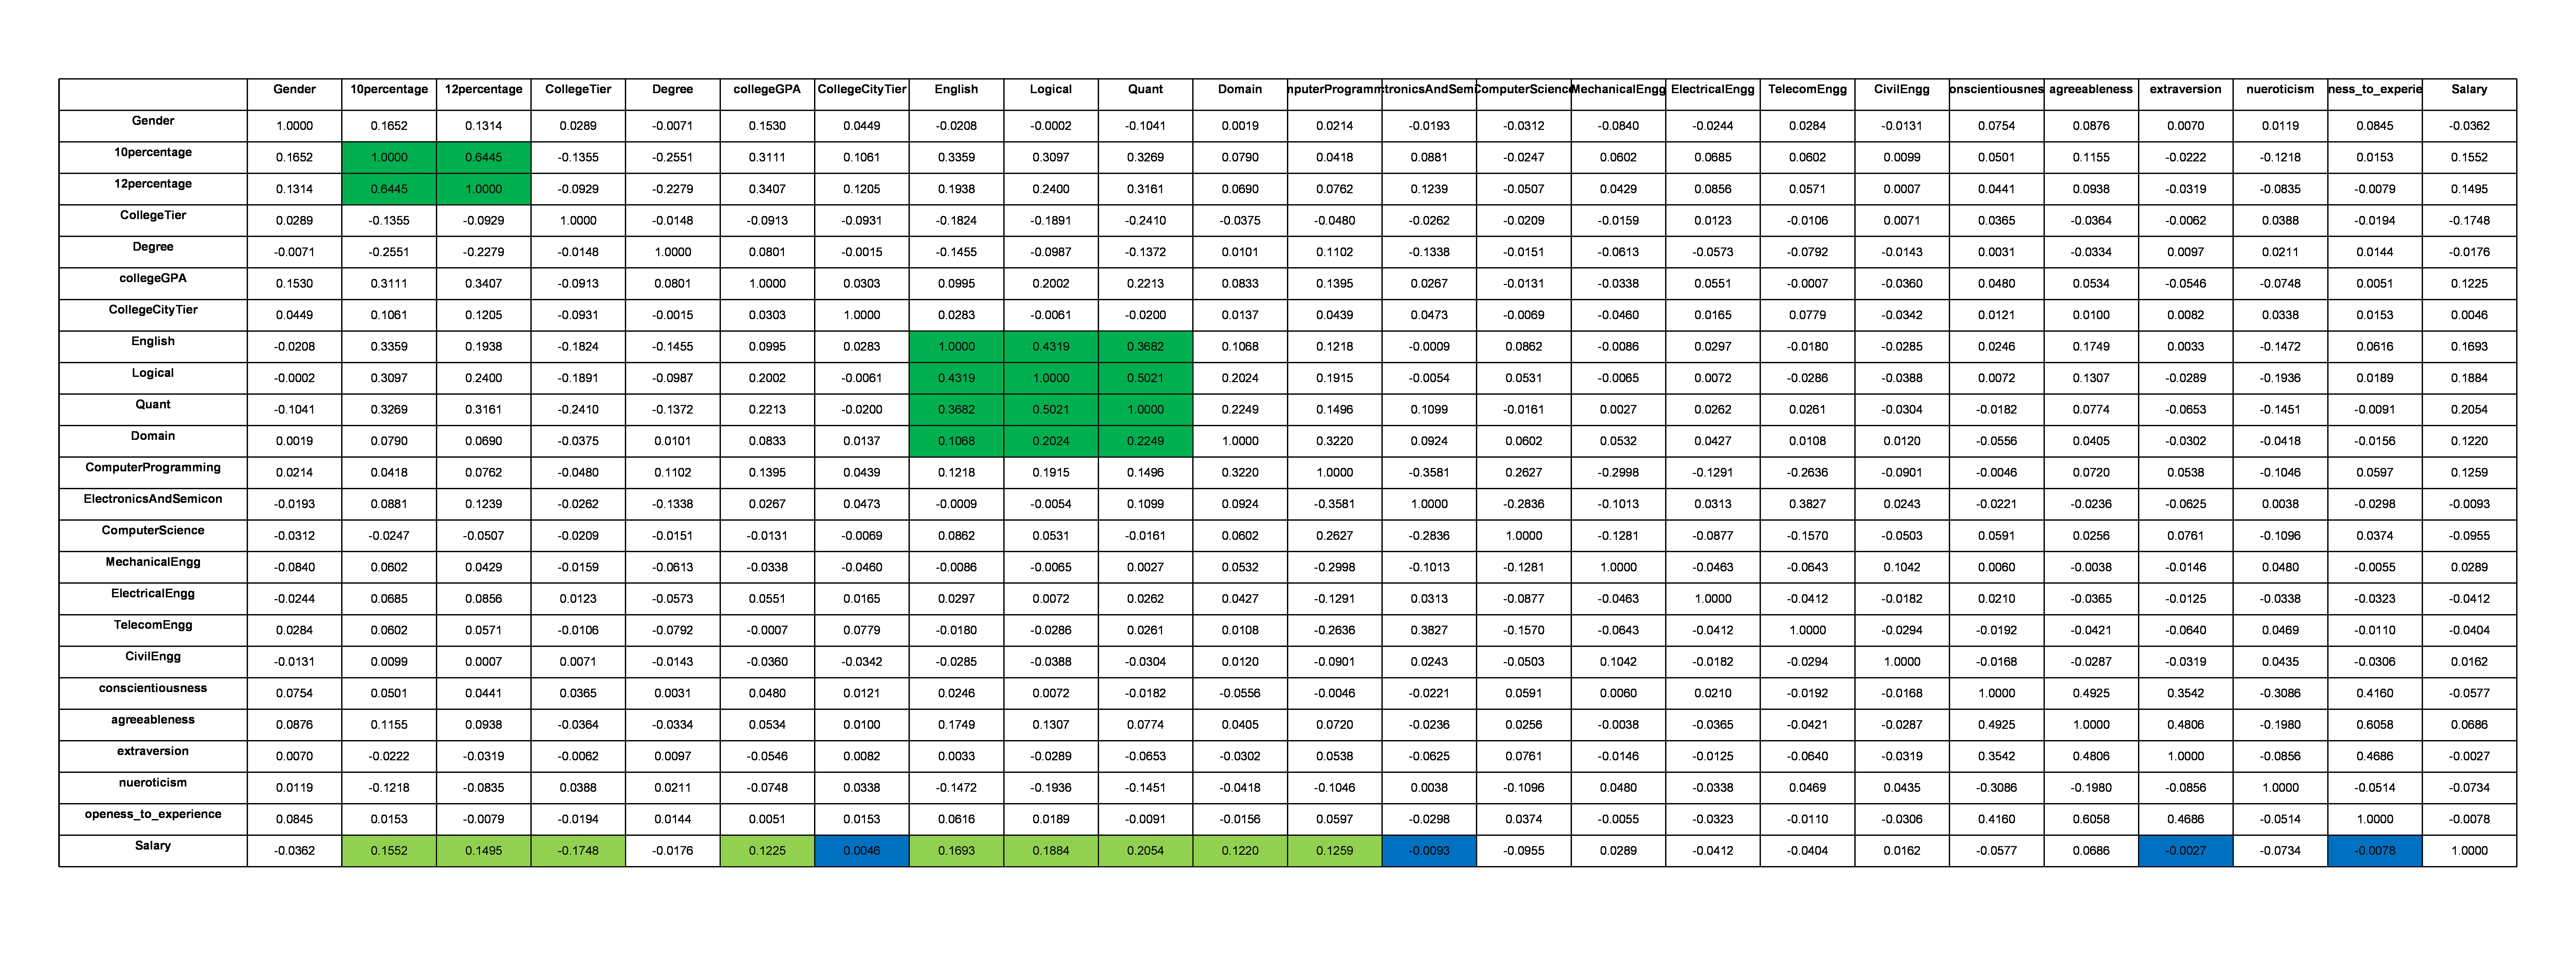

### Xử lý dữ liệu 

In [22]:
# MODE 1
# mô hình có các đặc trưng có hệ số tương quan với đặc trưng Salary từ 0.1 --> 0.3 (thuộc nhóm có hệ số lớn nhất)
features_01_to_03 = ['10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'English', 
                     'Logical', 'Quant', 'Domain', 'ComputerProgramming']

# MODE 2
# mô hình có các đặc trưng có hệ số tương quan với đặc trưng Salary từ 0.01 --> 0.3 (Loại bỏ những đặc trưng có hệ số tương quan quá nhỏ)
features_001_to_03 = ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'English', 
                      'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 
                      'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'nueroticism']

# MODE 3
# mô hình có các đặc trưng mới được tạo ra từ cách tính trung bình cộng các đặc trưng cũ (các đặc trưng cũ  phải tương thích và có hệ số tương quan > 0.1)
# Tạo đặc trưng mới bằng trung bình cộng
X_train['avg_10percentage_12percentage'] = X_train[['10percentage', '12percentage']].mean(axis=1)
X_train['avg_English_Logical_Quant'] = X_train[['English', 'Logical', 'Quant']].mean(axis=1)

features_newfeature = ['avg_10percentage_12percentage', 'avg_English_Logical_Quant']

# MODE 4
# Chọn tất cả 23 đặc trươg đầu tiên của DataFrame X_train
selected_23columns = X_train.columns[:23]

models = [features_01_to_03, features_001_to_03 , features_newfeature, selected_23columns]


## Thử nghiệm, so sánh các mô hình

In [23]:
# Phần code cho yêu cầu 1d
best_model = Find_Best_Model(models)

print('\nMô hình tốt nhất là: ',best_model)

# In ra các kết quả cross-validation như yêu cầu

Mode 1  | Avg MAE = 113678.27290397554
Mode 2  | Avg MAE = 111453.37341151787
Mode 3  | Avg MAE = 114563.04881623926
Mode 4  | Avg MAE = 111577.78643242033

Mô hình tốt nhất là:  ['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'nueroticism']


### Huấn luyện lại mô hình với mô hình tốt nhất trên toàn bộ tập huấn luyện

In [24]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
my_best_model = LinearRegression()

# Chọn đặc mô hình tốt nhất và huấn luyện mô hình trên toàn bộ dữ liệu
X_best = X_train[best_model]
y_best = y_train

my_best_model.fit(X_best, y_best)


LinearRegression()

### Công thức cho mô hình hồi quy tốt nhất mà sinh viên tìm được

In [25]:
print(CTMoHinh(my_best_model, best_model))

Salary = 91730.85 + -24795.791*Gender + 703.678*10percentage + 1048.662*12percentage + -96755.850*CollegeTier + 3664.376*Degree + 1317.729*collegeGPA + 139.267*English + 109.411*Logical + 92.895*Quant + 25007.500*Domain + 91.927*ComputerProgramming + -171.319*ComputerScience + 51.782*MechanicalEngg + -143.423*ElectricalEngg + -86.280*TelecomEngg + 141.299*CivilEngg + -20126.168*conscientiousness + 14787.990*agreeableness + -11570.417*nueroticism 


### kết quả trên tập kiểm tra (test.csv) cho mô hình tốt nhất tìm được

In [26]:
X_test1d = X_test[best_model]
y_pred1d = my_best_model.predict(X_test1d)
y_pred1d

array([262202.16533123, 356144.49139128, 322993.76554588, 216902.8491678 ,
       360510.28735511, 301889.20324849, 225722.33643657, 254291.83583178,
       259592.89622843, 321325.74806804, 224430.29229621, 258576.60275675,
       242006.49585217, 307469.59875831, 397965.20083491, 319825.87894547,
       245794.31479371, 167172.73825669, 345314.3233795 , 352427.65837023,
       260880.5692732 , 346540.98763993, 385062.52139422, 491537.91015337,
       164788.94495156, 354692.97272032, 306236.02562349, 358464.12344352,
       368853.2541646 , 309509.84319579, 270200.43904607, 340260.75302092,
       343347.05966043, 430753.21489385, 308390.08340698, 261805.50679135,
       510982.86001653, 300843.37751323, 398136.88961711, 294329.17857934,
       429487.90338902, 356032.54687424, 282860.11400839, 358087.84657668,
       237771.18236966, 404062.40945383, 272294.64929716, 257085.57509431,
       470229.2437303 , 358158.85371704, 218176.15220745, 381403.41808393,
       228319.64459277, 2

In [27]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
mse1d = mean_absolute_error(y_test, y_pred1d)

print("Mean Absolute Error:", mse1d)

Mean Absolute Error: 102989.2798338652


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$